In [4]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from Dive_into_deep_learning.d2l import torch as d2l

d2l.use_svg_display()

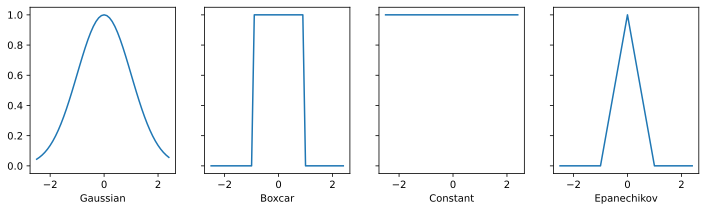

In [5]:
fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))

# Define some kernels
def gaussian(x):
    return torch.exp(-x ** 2 / 2)

def boxcar(x):
    return torch.abs(x) < 1.0

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return torch.max(1 - torch.abs(x), torch.zeros_like(x))

kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = torch.arange(-2.5, 2.5, 0.1)
for kernel, name, ax in zip(kernels, names, axes):
    ax.plot(x.detach().numpy(), kernel(x).detach().numpy())
    ax.set_xlabel(name)

In [6]:
x = torch.randn(3, 4)
print(x)
sorted, indices = torch.sort(x)
sorted

tensor([[-0.7443,  0.2519,  1.2665, -1.9978],
        [ 0.7315,  0.0278,  1.1242,  1.4091],
        [ 0.5314, -0.3265, -0.4894, -0.5993]])


tensor([[-1.9978, -0.7443,  0.2519,  1.2665],
        [ 0.0278,  0.7315,  1.1242,  1.4091],
        [-0.5993, -0.4894, -0.3265,  0.5314]])

In [7]:
x

tensor([[-0.7443,  0.2519,  1.2665, -1.9978],
        [ 0.7315,  0.0278,  1.1242,  1.4091],
        [ 0.5314, -0.3265, -0.4894, -0.5993]])

In [8]:
indices

tensor([[3, 0, 1, 2],
        [1, 0, 2, 3],
        [3, 2, 1, 0]])

In [9]:
def f(x):
    return 2 * torch.sin(x) + x

n = 40
x_train, _ = torch.sort(torch.rand(n) * 5)
y_train = f(x_train) + torch.randn(n)
x_val = torch.arange(0, 5, 0.1)
y_val = f(x_val)

# Attention Pooling via Nadaraya-Watson Regression

In [10]:
def nadaraya_watson(x_train, y_train, x_val, kernel):
    # (40, 1) - (1, 50)
    dists = x_train.reshape((-1, 1)) - x_val.reshape((1, -1))
    # Each column/row corresponds to each query/key
    k = kernel(dists).type(torch.float32)
    # Normalization over keys for each query
    attention_w = k / k.sum(0)
    y_hat = y_train @ attention_w
    return y_hat, attention_w

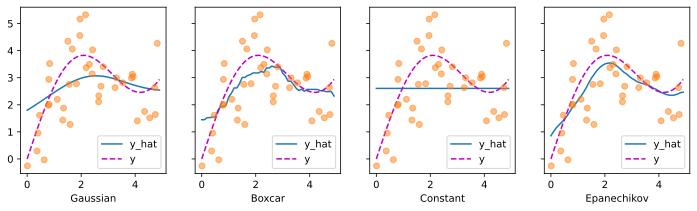

In [11]:
def plot(x_train, y_train, x_val, y_val, kernels, names, attention=False):
    fig, axes = d2l.plt.subplots(1, 4, sharey=True, figsize=(12, 3))
    for kernel, name, ax in zip(kernels, names, axes):
        y_hat, attention_w = nadaraya_watson(x_train, y_train, x_val, kernel)
        if attention:
            pcm = ax.imshow(attention_w.detach().numpy(), cmap='Reds')
        else:
            ax.plot(x_val, y_hat)
            ax.plot(x_val, y_val, 'm--')
            ax.plot(x_train, y_train, 'o', alpha=0.5)
        ax.set_xlabel(name)
        if not attention:
            ax.legend(['y_hat', 'y'])
    if attention:
        fig.colorbar(pcm, ax=axes, shrink=0.7)

plot(x_train, y_train, x_val, y_val, kernels, names)

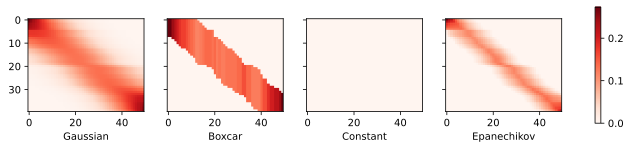

In [10]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)